In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")



df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df.drop("Unnamed: 32", inplace=True, axis=1)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

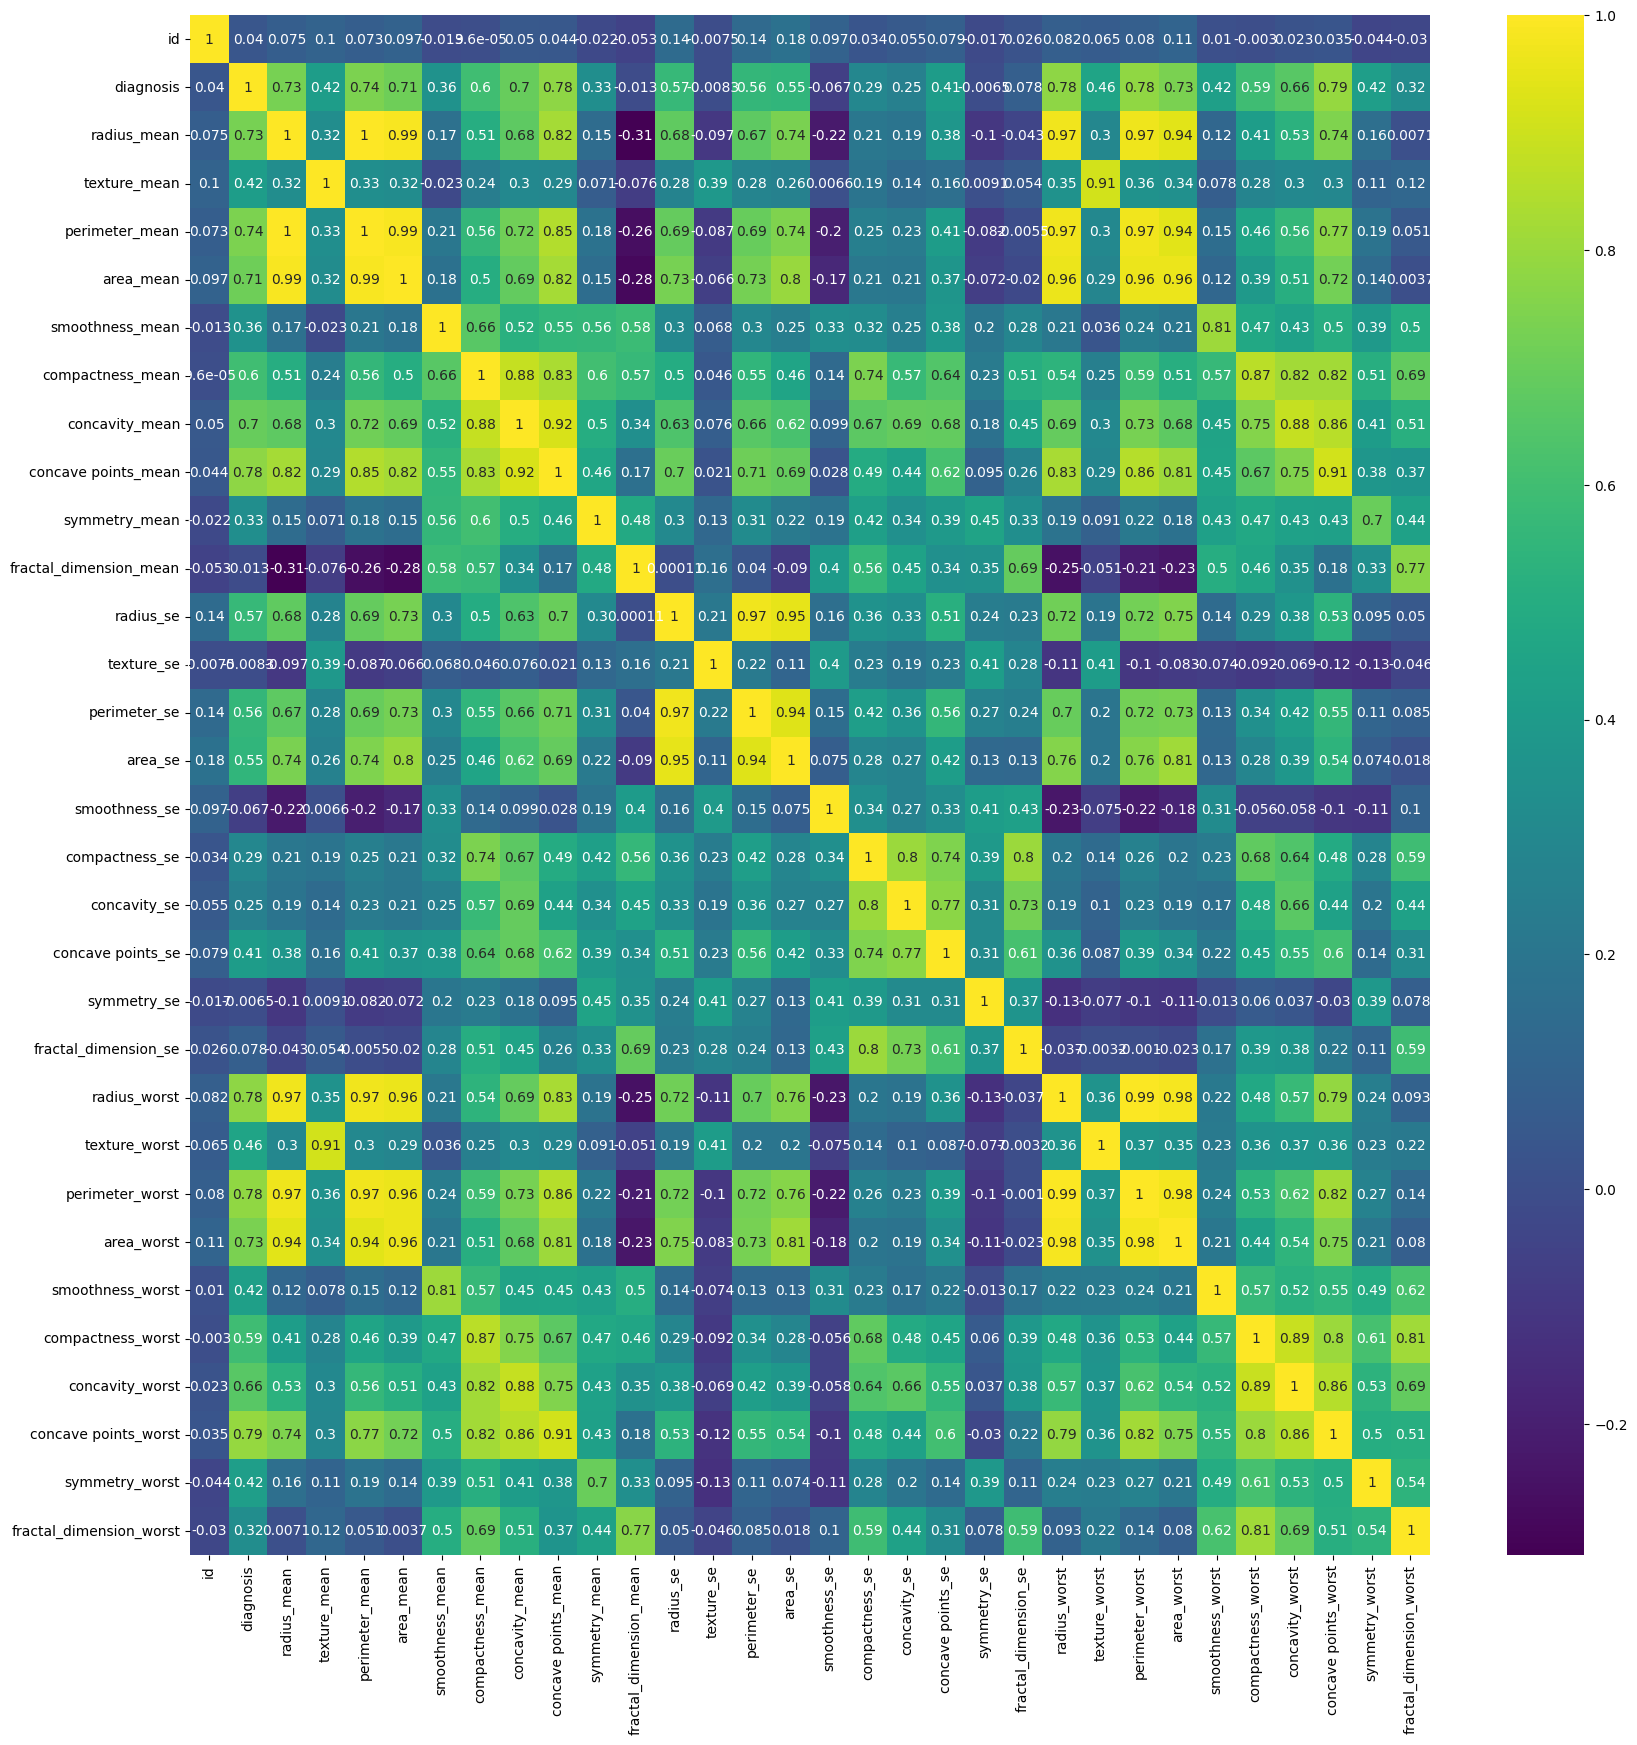

In [54]:
plt.figure(figsize=(20, 20))  # Figure size

sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [55]:
target = df['diagnosis']


df.drop('diagnosis', axis=1, inplace=True)



In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Z = sc.fit_transform(df)
Z


array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [57]:
from sklearn.decomposition import PCA

pca = PCA()

Coord = pca.fit_transform(Z)

As a reminder, the axes constructed by the PCA are mutually independent and meet at the center of a cloud of points.

The whole point of the PCA lies in this independence, since the analysis brings out very different types of information and spatial organization for each axis.
In addition, the factors are hierarchical and take up decreasing shares of the variance, with the first axes generally concentrating the bulk of the information, which further facilitates analysis.



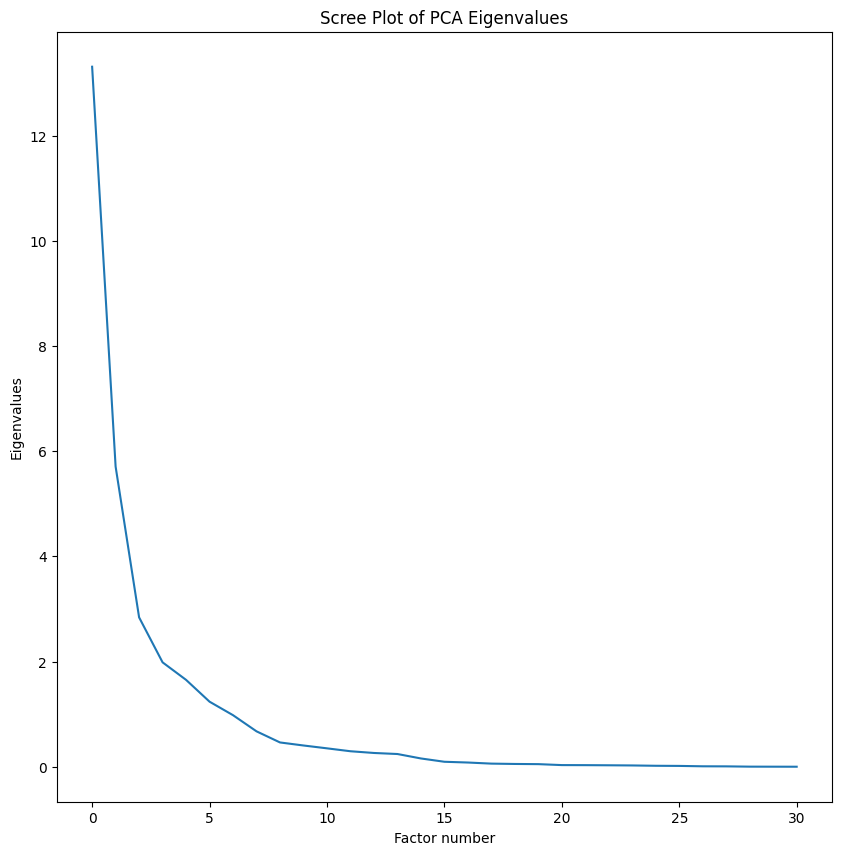

In [60]:
num_factors = len(pca.explained_variance_)
plt.figure(figsize=(10, 10))
plt.plot(range(num_factors), pca.explained_variance_)
plt.xlabel('Factor number')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot of PCA Eigenvalues')
plt.show()

Ratios are: [4.28647013e-01 1.83767915e-01 9.14643564e-02 6.39147476e-02
 5.31875905e-02 3.98281519e-02 3.15572013e-02 2.16694506e-02
 1.48642719e-02 1.30042934e-02 1.12630637e-02 9.48033657e-03
 8.42409435e-03 7.78484562e-03 5.06366610e-03 3.03640406e-03
 2.57451447e-03 1.90471846e-03 1.69649015e-03 1.58457831e-03
 1.00228336e-03 9.65845343e-04 8.84855607e-04 7.82226523e-04
 5.81914867e-04 4.99346119e-04 2.63603188e-04 2.22519447e-04
 5.12689531e-05 2.41411630e-05 4.29161956e-06]


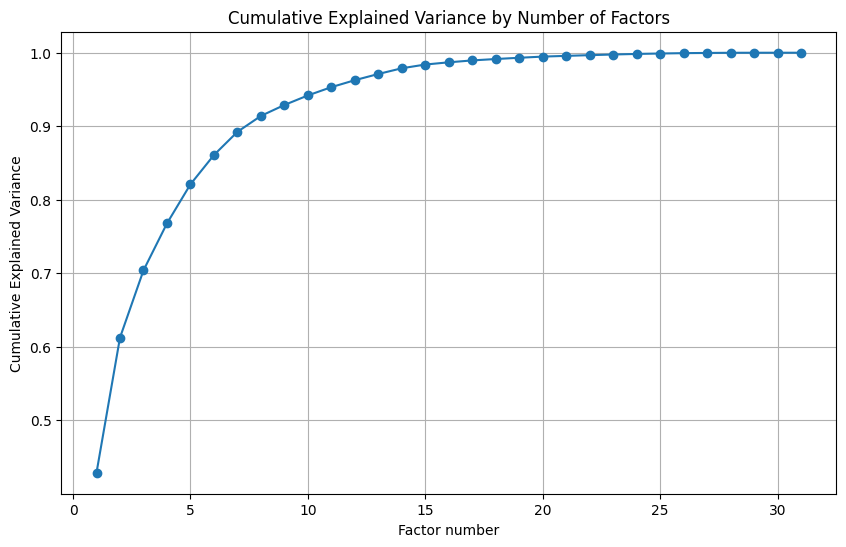

In [62]:
print('Ratios are:', pca.explained_variance_ratio_)

# Generate x values dynamically to match the length of explained variance ratio
x_values = np.arange(1, len(pca.explained_variance_ratio_) + 1)

plt.figure(figsize=(10, 6))
plt.plot(x_values, np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Factor number')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Factors')
plt.grid(True)
plt.show()


([<matplotlib.patches.Wedge at 0x135c81450>,
 [Text(0.24451837326642667, 1.0724787947251642, 'PC1'),
  Text(-1.090860151935128, -0.14150663913777992, 'PC2'),
  Text(-0.6001820012921891, -0.9218359752824267, 'PC3'),
  Text(-0.09776086038601432, -1.0956472124623813, 'PC4'),
  Text(0.3028248925159885, -1.0574956664084634, 'PC5'),
  Text(0.5946270016254694, -0.9254289432138505, 'PC6'),
  Text(0.9964980150503877, -0.46582368552987685, 'Autres')],
 [Text(0.13337365814532362, 0.5849884334864531, '42.865%'),
  Text(-0.5950146283282515, -0.07718543952969813, '18.377%'),
  Text(-0.32737200070483036, -0.5028196228813236, '9.146%'),
  Text(-0.053324105665098716, -0.5976257522522078, '6.391%'),
  Text(0.16517721409963007, -0.57681581804098, '5.319%'),
  Text(0.32434200088661963, -0.5047794235711911, '3.983%'),
  Text(0.543544371845666, -0.2540856466526601, '13.919%')])

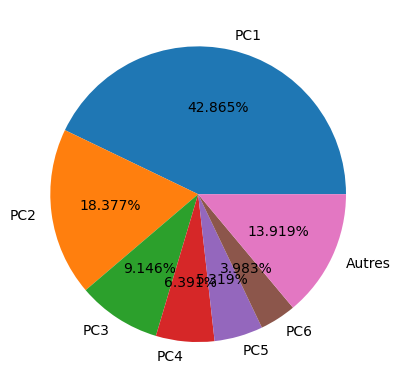

In [63]:
L1 = list(pca.explained_variance_ratio_[0:6])
L1.append(sum(pca.explained_variance_ratio_[6:31]))

plt.pie(L1, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'Autres'], 
        autopct='%1.3f%%')

<Axes: >

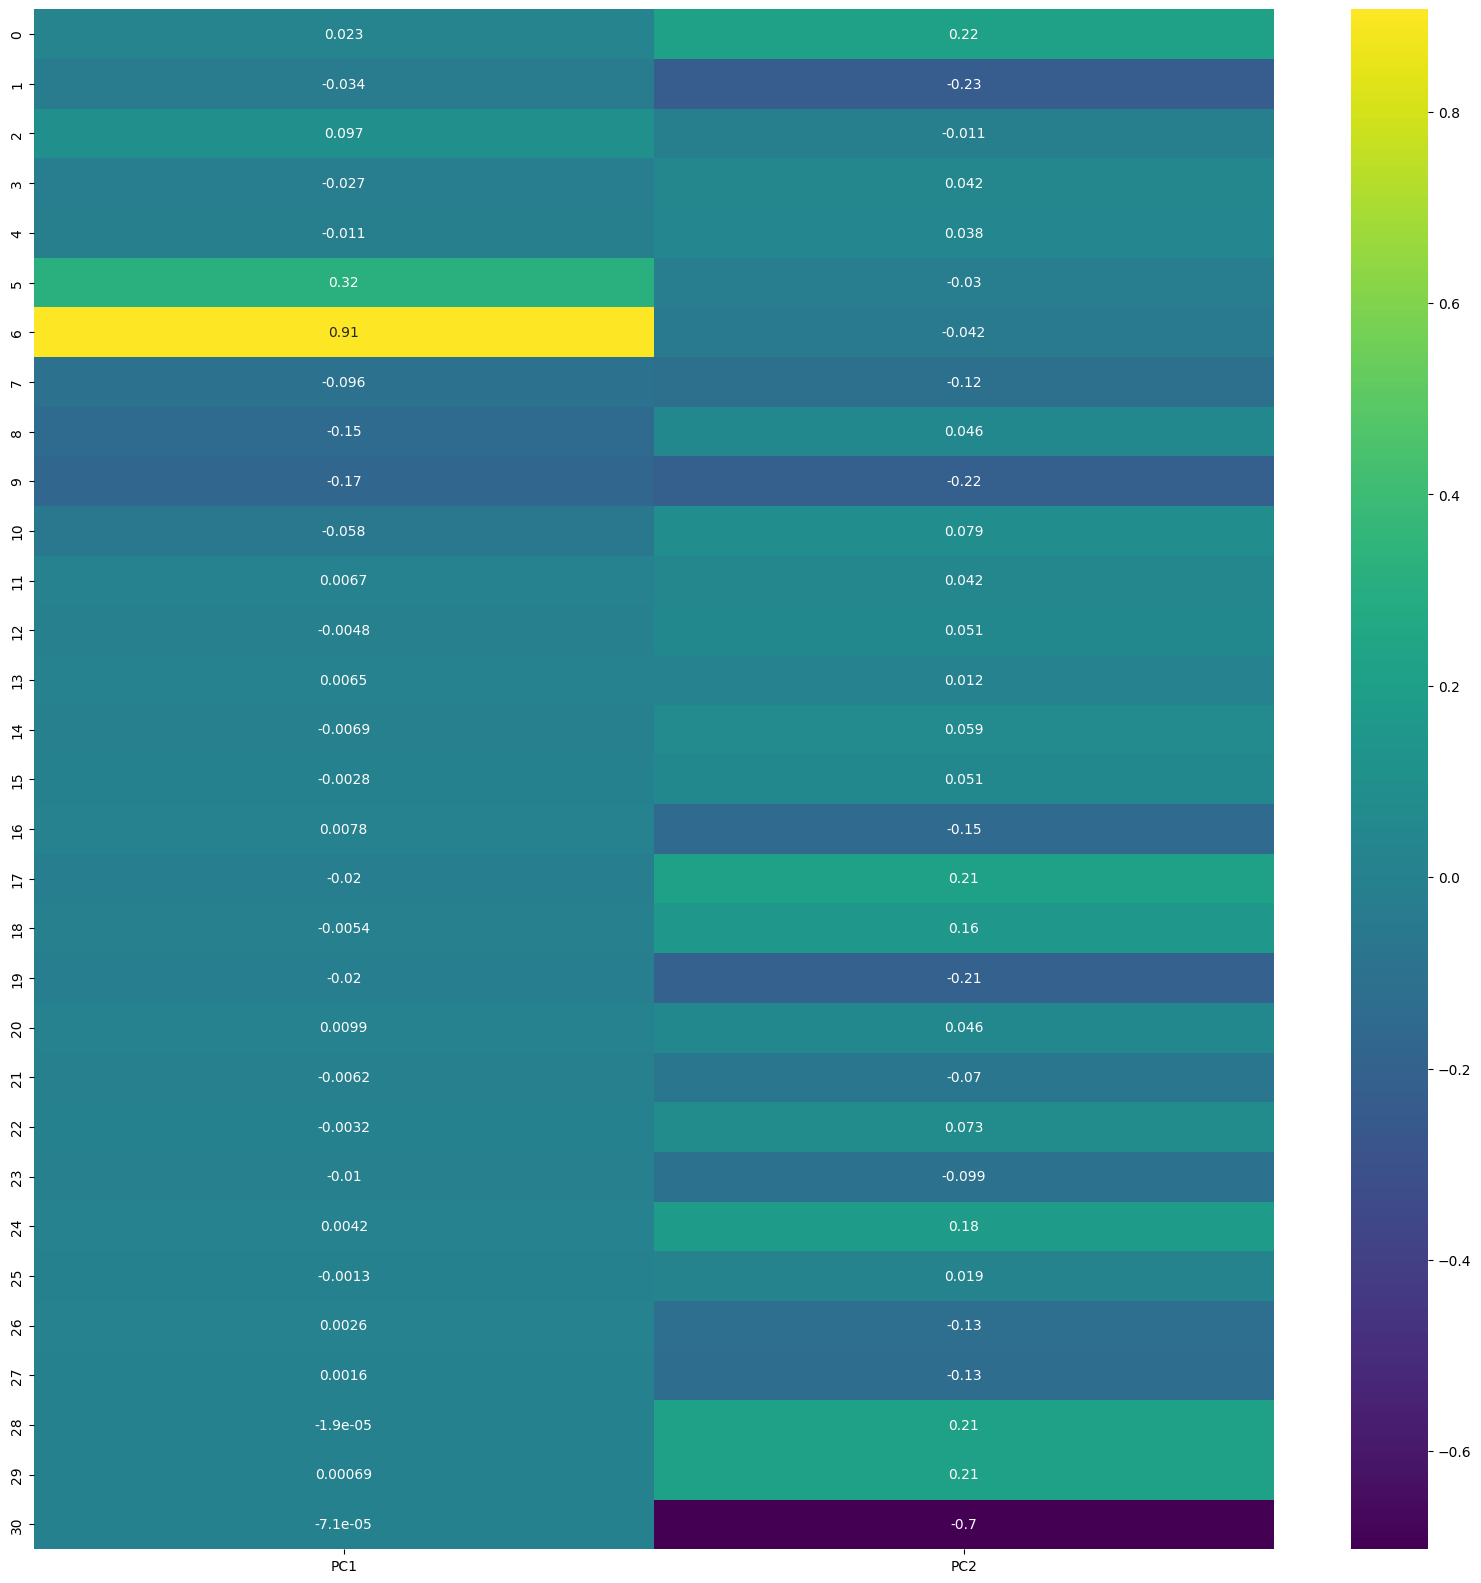

In [64]:
Comp_PCA = pd.DataFrame({'PC1': pca.components_[:, 0], 'PC2': pca.components_[:, 1]})

plt.figure(figsize=(20, 20))

sns.heatmap(Comp_PCA, annot=True, cmap='viridis')

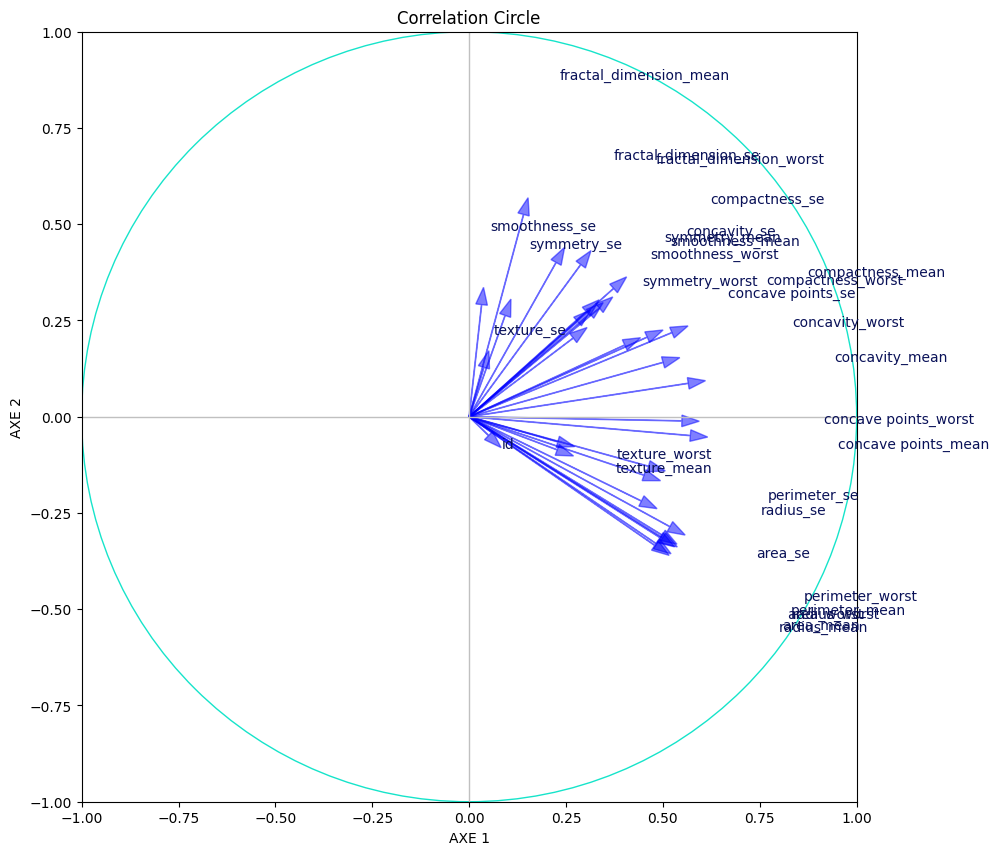

In [67]:
racine_valeurs_propres = np.sqrt(pca.explained_variance_)

# Dynamically determine the correct dimensions for corvar
corvar = np.zeros((pca.components_.shape[1], pca.components_.shape[0]))

# Populate corvar with the scaled components
for k in range(pca.components_.shape[0]):
    corvar[:, k] = pca.components_[k, :] * racine_valeurs_propres[k]

# Define the figure
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Display variables
for j in range(corvar.shape[0]):  # Use dynamic range based on the number of features
    plt.annotate(df.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6, alpha=0.5, head_width=0.03, color='b')

# Add axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Circle and legends
cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2')
plt.title('Correlation Circle')
plt.grid(False)
plt.show()


<Axes: xlabel='AXE 1', ylabel='AXE 2'>

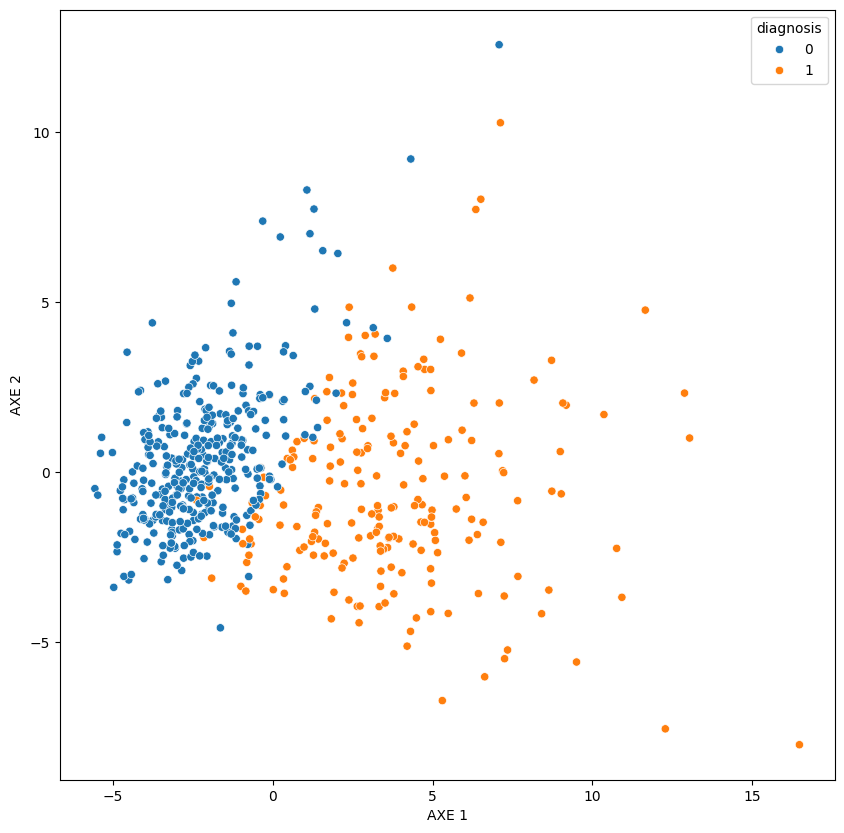

In [69]:
PCA_mat = pd.DataFrame({'AXE 1': Coord[:, 0], 'AXE 2': Coord[:, 1], 'target': target})
plt.figure(figsize=(10, 10))

sns.scatterplot(x='AXE 1', y='AXE 2', hue=target, data=PCA_mat)